# Results Presentation Notebook
## Connor Holleran and Brian Cropp

With our data cleanly organized in our SQL database we are able to us SQL to do the heavy lifting of our data as we explore trends. To execute SQL statements, we wrote a sqlexcute function to execute our SQL statements and creates a table of the data for our visualization tool to use.

In [3]:
%run functions.py

In [5]:
def sqlexecute(command, filename):
    '''
    The following function takes an input of an SQL command, and filename. It sets up the database, performs the 
    command, and exports a csv file of the commands outcome table for use in the tableau visualization application. 
    The filename input is the name of the outputed csv file.
    '''
    creds = opencreds() # Get creds from the opencreds function
    database = creds['MySQL']["user"] # Define database from creds
    user = creds['MySQL']['user'] # Define username from creds
    password = creds['MySQL']['password'] # Define password from creds
    engine, connection, cstring = database_setup(user, password, database) # run the database_setup function to set up SQL database
    df = pd.read_sql_query(command, connection) # Create df 
    df.to_csv(filename+".csv", sep=',') # Export csv of dataframe named filename

## Question 1.1
### What aspects have stayed the same from 1941 till present day? 

Since 1941, the tech behind recording, playing, and listening to music has changed so so much. We were first interested in seeing over the history of the billboard charts, what elements in audio features have not changed over time. There much be traits about our music that are enjoyable for the human ear or mattter what the tech behind it. We sought to see what has stayed the same since then.

To do this, we selected all of our variables in SQL from both tables and inner joined then on the I variable.

In [ ]:
command = """
SELECT Top_100_Songs_All_Time.Year, Top_100_Songs_All_Time.Rank, Top_100_Songs_All_Time.Artist, Top_100_Songs_All_Time.Track,
features.acousticness, features.danceability, features.duration_ms, features.energy, features.instrumentalness, 
features.key_, features.liveness, features.loudness, features.mode, features.speechiness, features.tempo, features.time_signature, 
features.valence
FROM features
INNER JOIN Top_100_Songs_All_Time ON features.I=Top_100_Songs_All_Time.I
""" # Commad to achieve joinned table
filename = "join_basic" # New file name
sqlexecute(command, filename) # Run the SQL execute function to run the command and output file

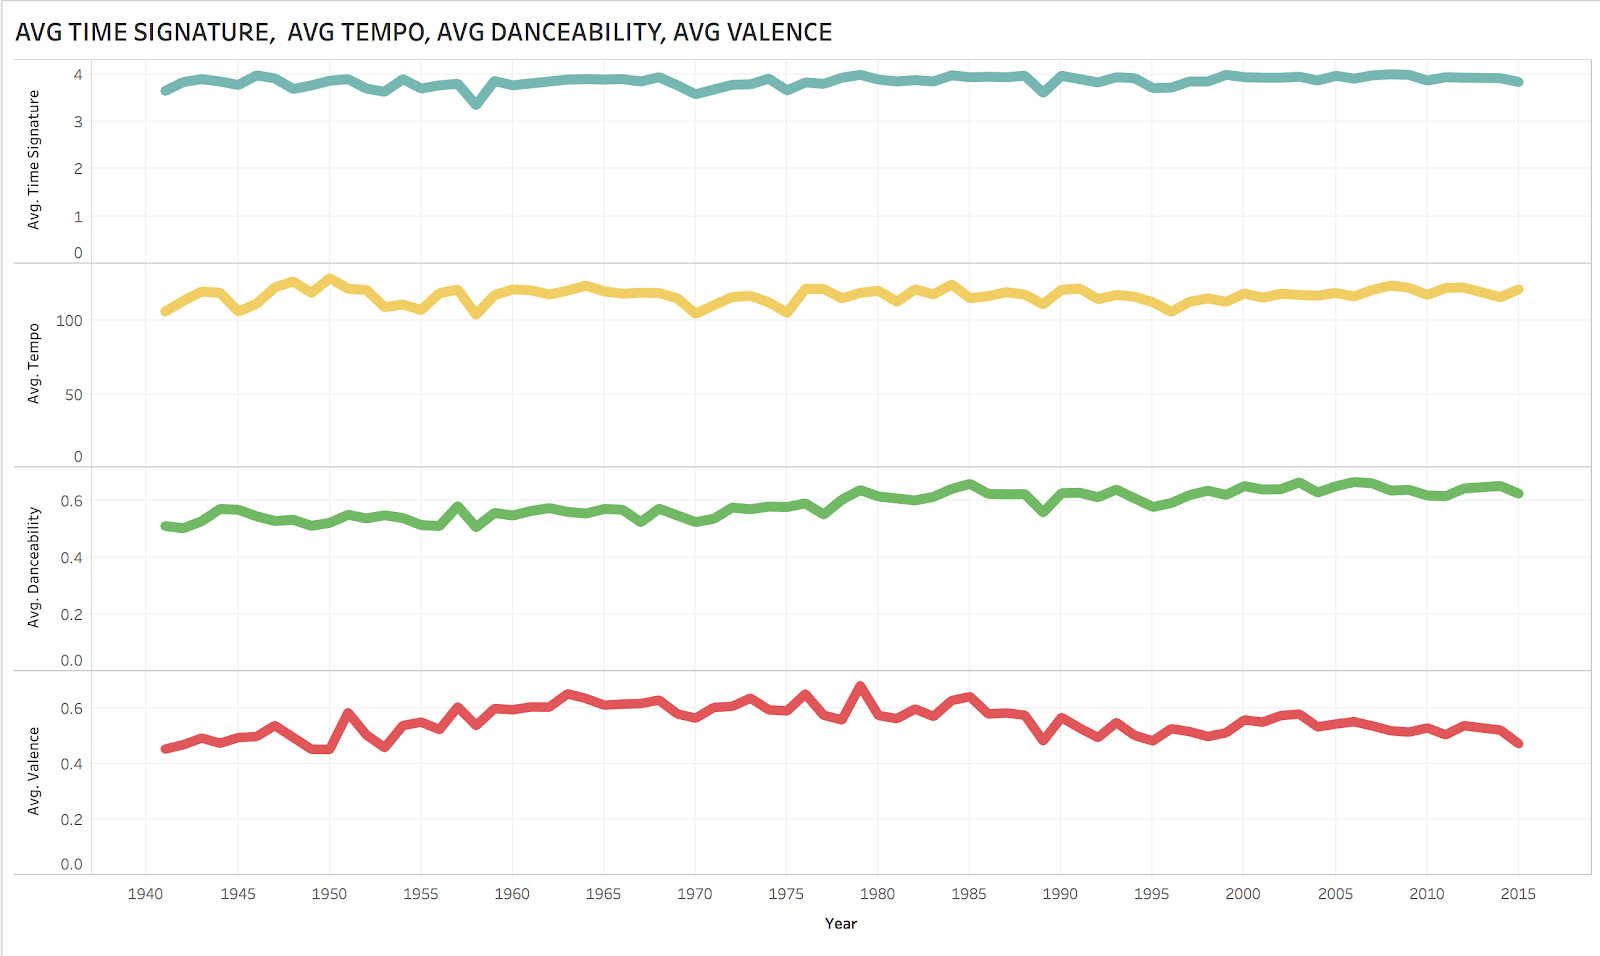

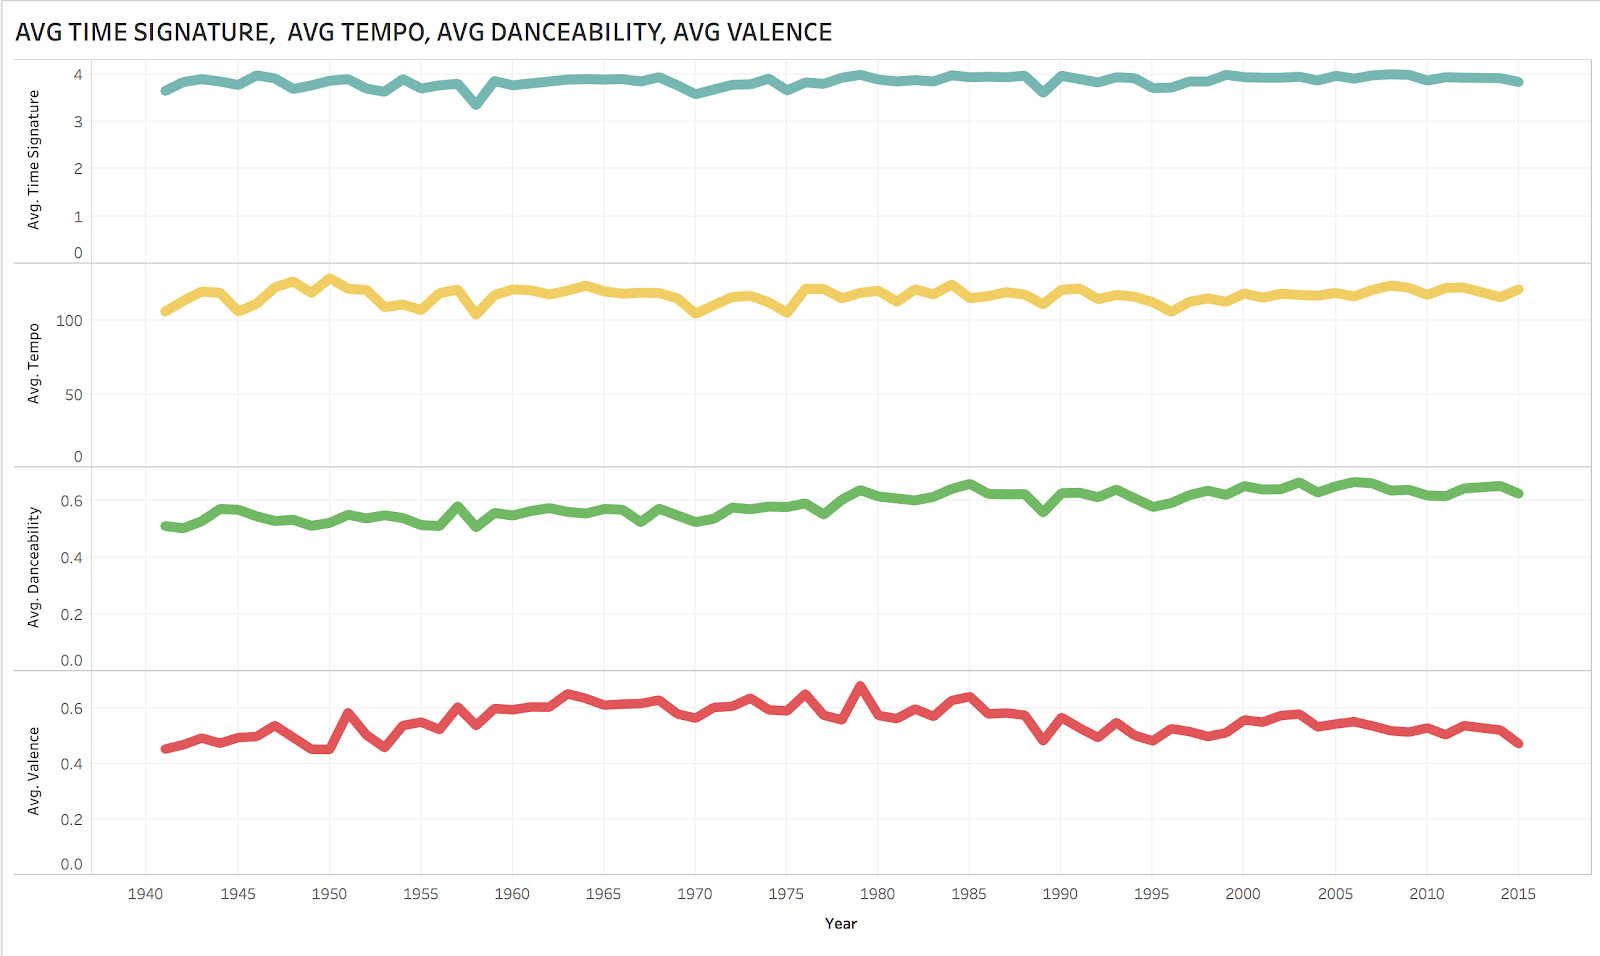

In [4]:
from IPython.display import Image
Image(filename='First Question_CS_Final.png')

We wanted to create an image to elp us answer this question. When first exploring the data, we wanted to see if there were traits that would help us understand what specific attributes make a hit song. By looking at this graph, we could see that the tempo should be around 4 beats, it should be a fast song by exceeding 100 beats per minute, the song should be able to dance to it, and the song should have some positive vibe portrayed throughout the length of the song. We believe that dancibility is a very high variable in a hit song due to the fact that when an artist writes a song, they want to create a fun environment in which people dance or sing to their song. What shocked us the most in this visual is the tempo hovering around a similar value. Before creating this visual, we expected that tempo was going to be a variable that would change over time of hit music. We thought this because in today’s hit music it seems like EDM (dance) music has taken over and made the tempo of the songs faster, although this visual proves us wrong. 


## Question 1.2
### What characteristics of a song have changed from 1941 till present day? 


To contrast the above question, we wanted to look at what variables in the features table have changed most over time. What features in music have been impacted by changes in technology.

To achieve this table, we joined the features and the Top_100_Songs_All_Time tables with an inner join via the I variable. Then for all the variables except year, we took the avg as we grouped by year. THis gave us year to year avg of audio features.

In [ ]:
command = '''
SELECT Top_100_Songs_All_Time.Year, avg(features.acousticness), avg(features.danceability), avg(features.duration_ms), avg(features.energy), avg(features.instrumentalness), 
avg(features.key_), avg(features.liveness), avg(features.loudness), avg(features.mode), avg(features.speechiness), avg(features.tempo), avg(features.time_signature), 
avg(features.valence)
FROM features
INNER JOIN Top_100_Songs_All_Time ON features.I=Top_100_Songs_All_Time.I
group by Top_100_Songs_All_Time.Year
'''
filename = "group_by_year_avg"
sqlexecute(command, filename)

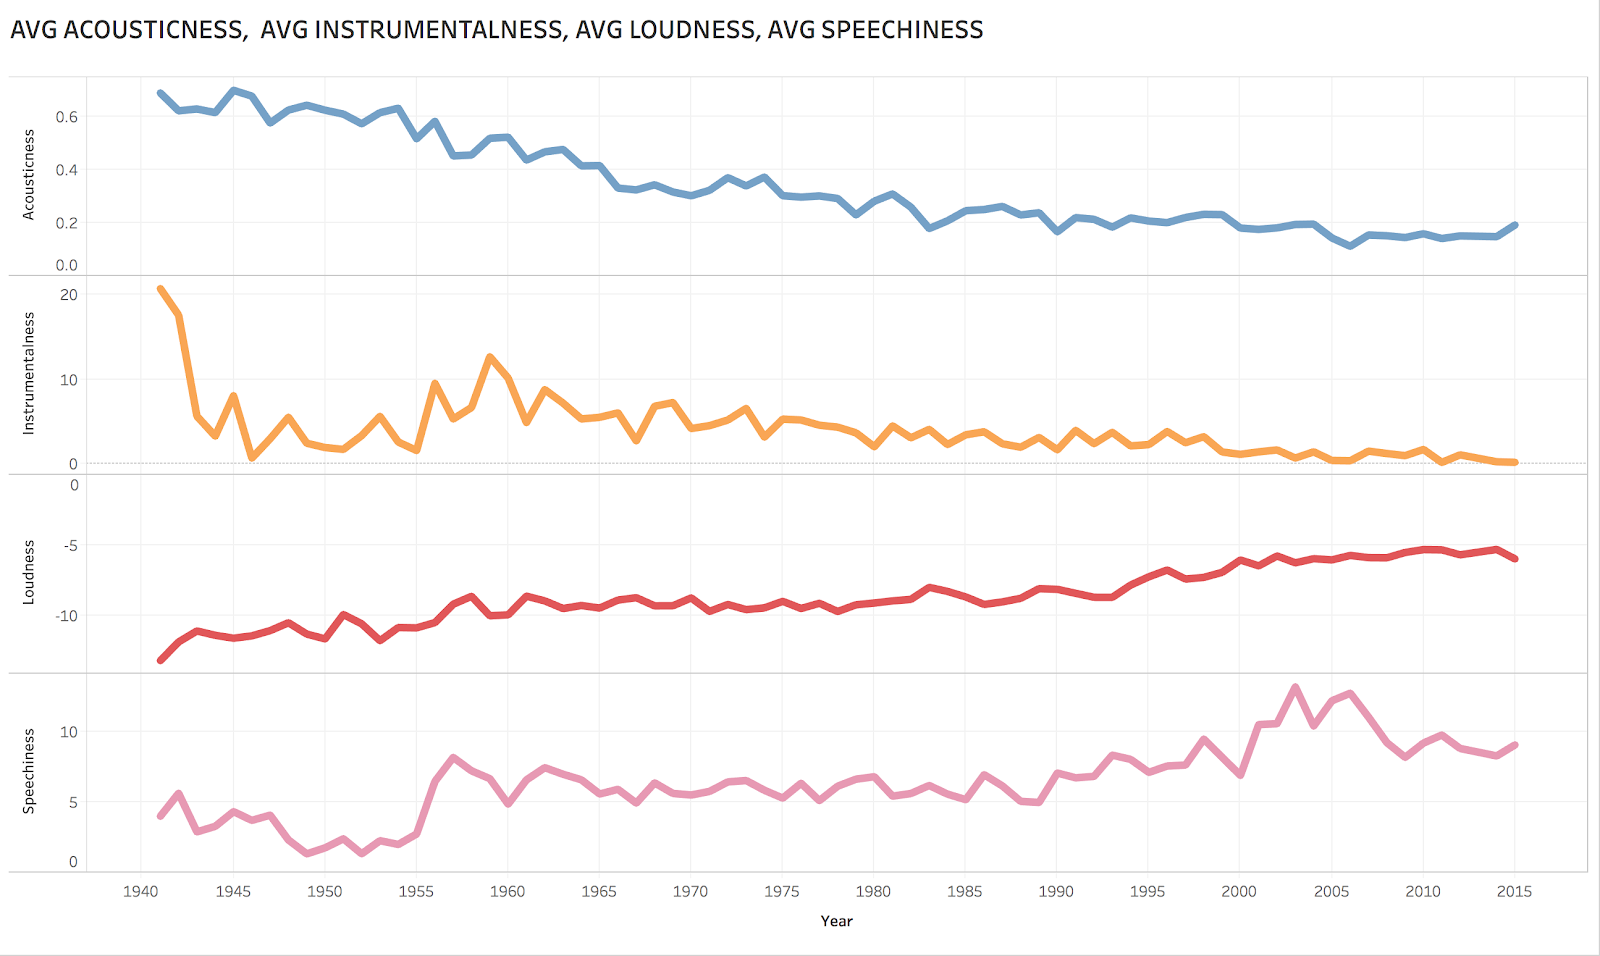

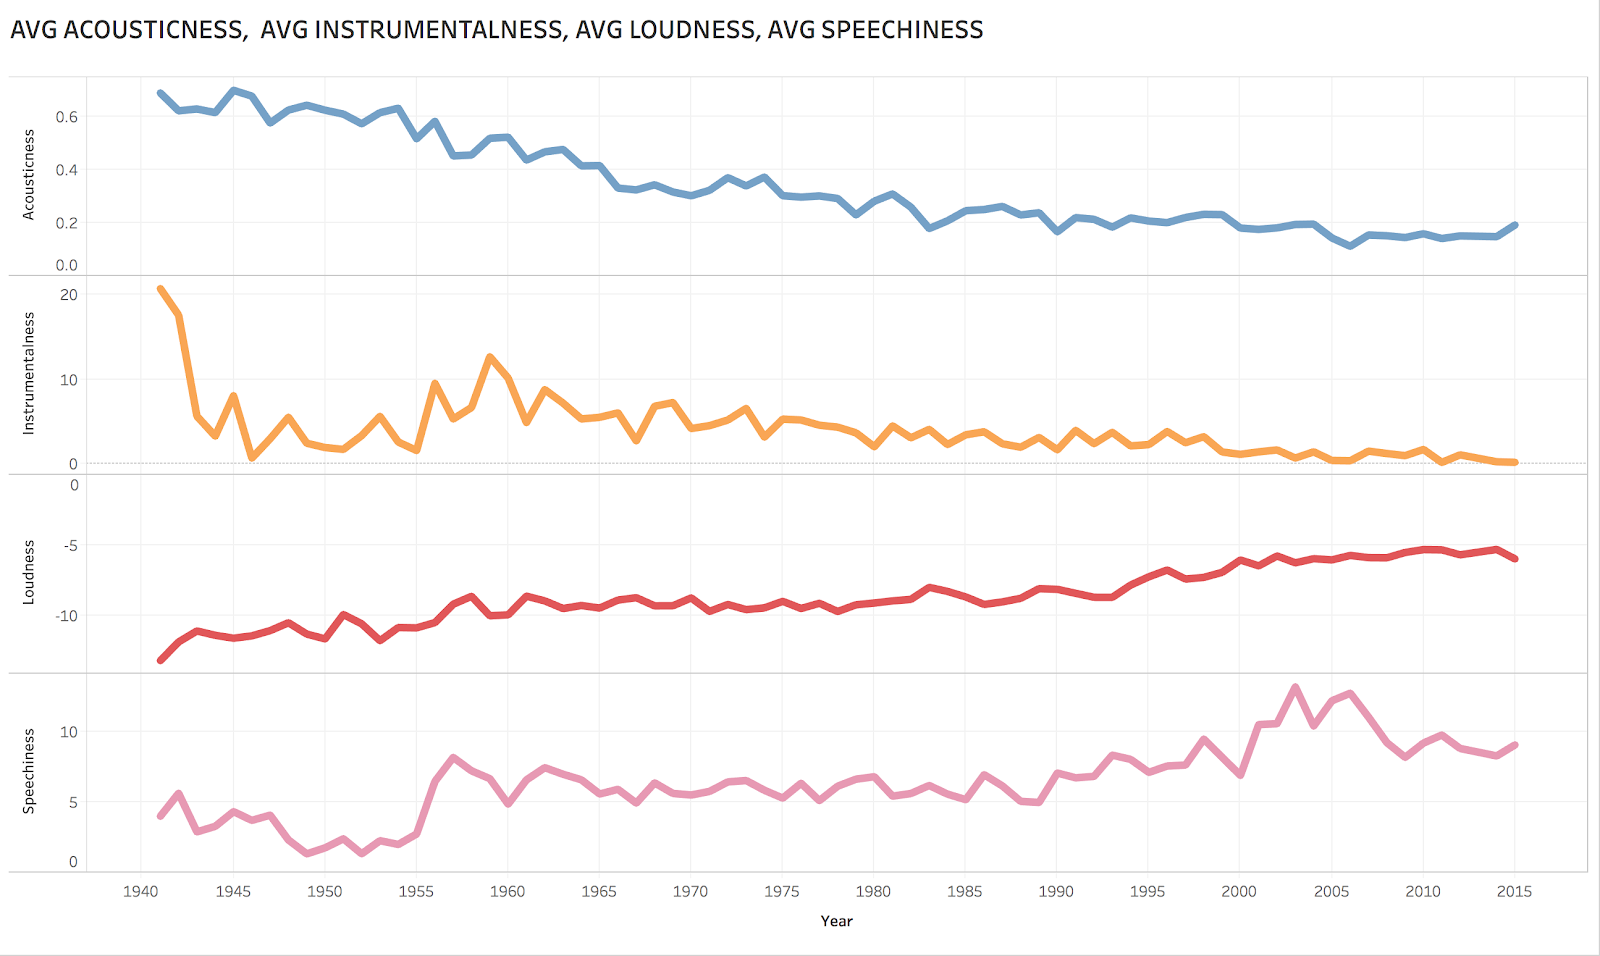

In [3]:
from IPython.display import Image
Image(filename='Second Question_CS_Final.png')

In this next visual we wanted to create something that would help us see trends of an increase or decrease of characteristics of a song. When we first explored the data, given to us through the use of Spotify, and after the creation of the previous graph we decided to create an image to help portray to you what variables have changed in music since 1941. As you can tell there has been a steady decrease in acousticness since 1941, which does make sense with all the new music being more hip hop and R&B. With these genres gaining more popularity we have seen less and less artists that base their music around acousticness. Similar to the previous variable, instrumentalness has seen a decrease in popularity for music artists when they create their songs. We believe this decline is due in part of dance music and how the creation of musical beats coming from our computers. While these two variables decrease we see that there are two variables, loudness and speachness, have inclined since 1941. We believe that these two variables have increased to the fact that these new records coming out have great sound to them, giving them more of a loudness and have the ability to articulate the words better. 


## Question 2 
### Is there any other variable that could account for the rise of EDM in music today? 

The whole concept of Electronic Dance Music has become popular in the past few years. THe genre is a product of tech changes in music production as the style of producing the denre of music is all computer based. We chose to look at a few variables that might explain the genres popularity yet fitting in the bounds of how popular music forumulicly can do.

To look at this table in SQL we performed the same operations as in Question 1.2 looking at the avg per year.

In [ ]:
command = '''
SELECT Top_100_Songs_All_Time.Year, avg(features.acousticness), avg(features.danceability), avg(features.duration_ms), avg(features.energy), avg(features.instrumentalness), 
avg(features.key_), avg(features.liveness), avg(features.loudness), avg(features.mode), avg(features.speechiness), avg(features.tempo), avg(features.time_signature), 
avg(features.valence)
FROM features
INNER JOIN Top_100_Songs_All_Time ON features.I=Top_100_Songs_All_Time.I
group by Top_100_Songs_All_Time.Year
'''
filename = "group_by_year_avg"
sqlexecute(command, filename)

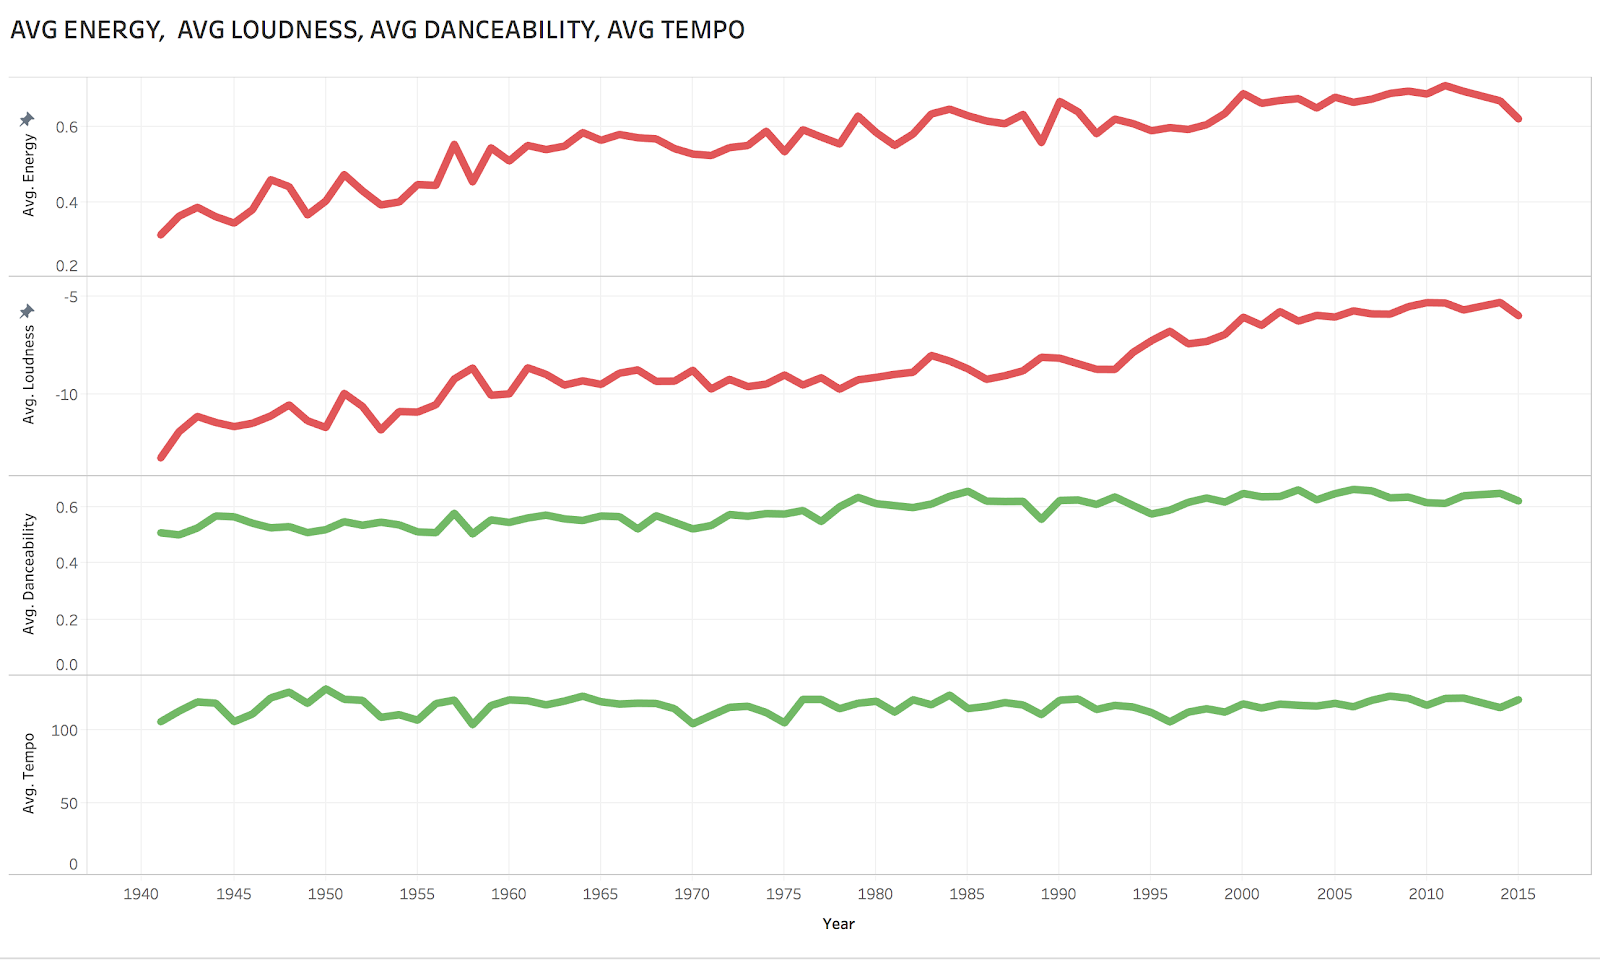

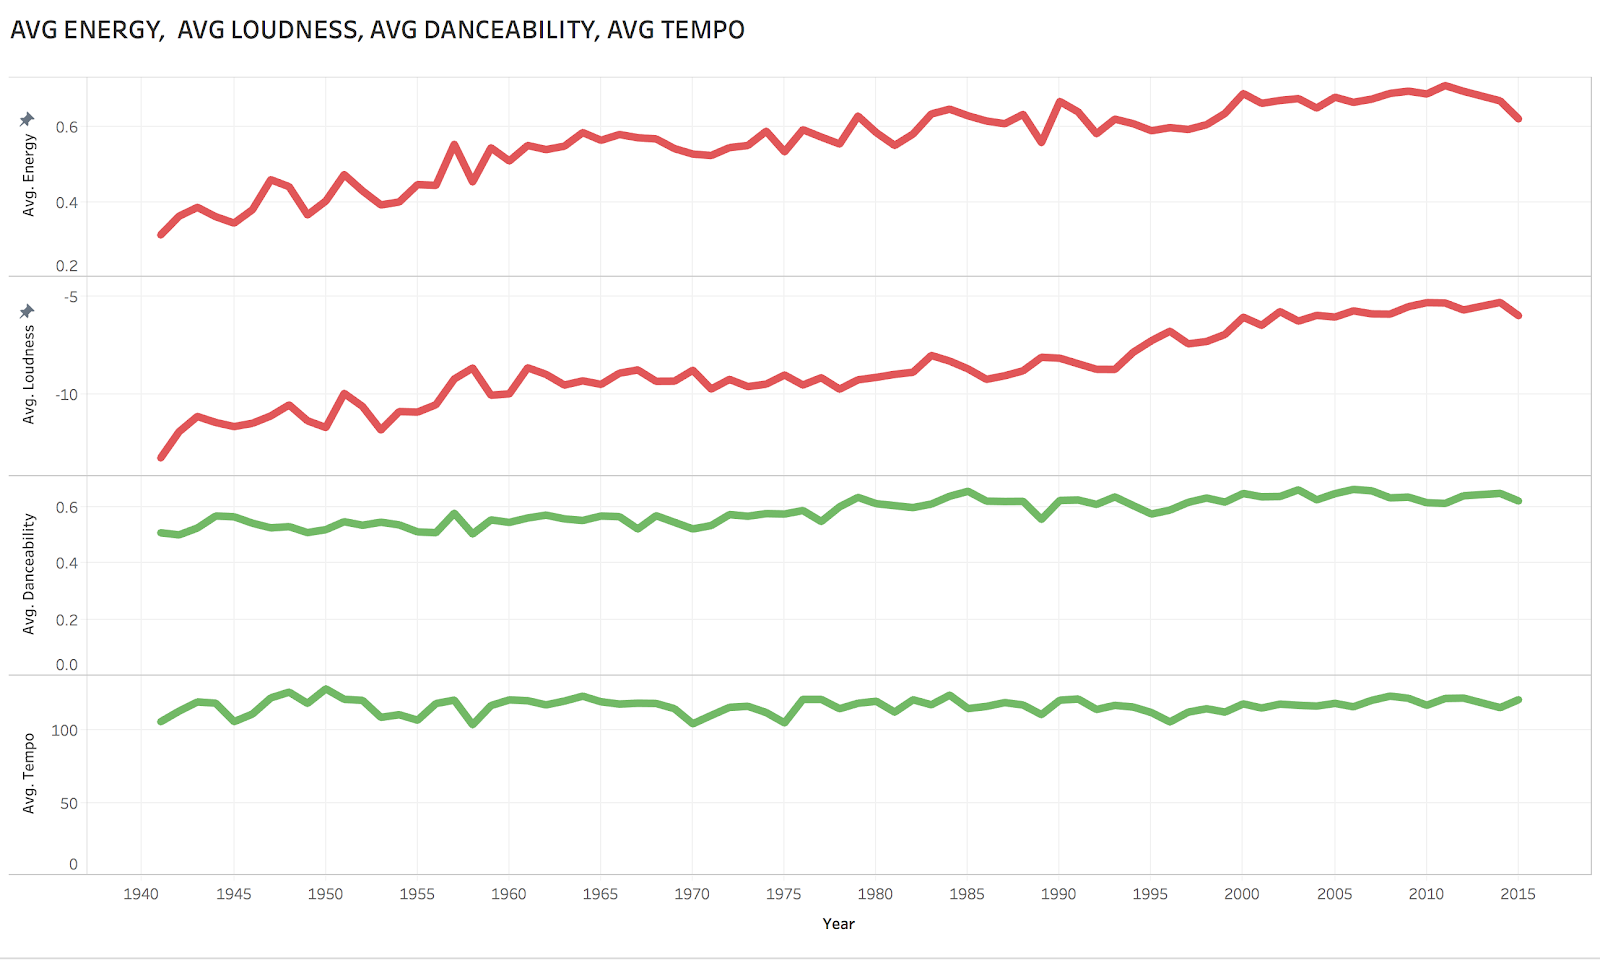

In [1]:
from IPython.display import Image
Image(filename='Third Question_CS_Final.png')

   In this visual, we wanted to draw from our first visual that we created, which talked about what variables have stayed the same since 1941. One of the variables on the first visual was tempo, which shocked us that it stayed the same throughout 1941 till present day music. Like we stated earlier, we thought that the rise of EDM music that we have today would make the tempo graph have be increasing since 1941. This visual that we have created for this question we can see that average energy of a song has increased since 1941. We believe this visual explains the rise of EDM music and how it has become so popular to everyone in the world today. 


## Question 3
### What artist has the most top 100 billboard songs since 1941? 

Finally we were intersted in looking at the names of the artists that have had the largest charting success in the history of the Billboard Music Charts. We decided since there are over 6000 entries, for our visual we would look at only those that had a chart hit 10 times or more.

In sql we had to create a table of the grouped by count of artists. Then, from that table, we selected all where the count was greater or equal to 10. We joined the features and the Top_100_Songs_All_Time tables with an inner join via the I variable. Then for all the variables except year, we took the avg as we grouped by year. THis gave us year to year avg of audio features.

In [ ]:
command = '''
SELECT * FROM
(SELECT Top_100_Songs_All_Time.Artist, count(Top_100_Songs_All_Time.Artist) as count
FROM Top_100_Songs_All_Time
INNER JOIN features ON features.I=Top_100_Songs_All_Time.I
group by Top_100_Songs_All_Time.Artist) as table1
where table1.count  >= 10
'''
filename = "top_charting"
sqlexecute(command, filename)

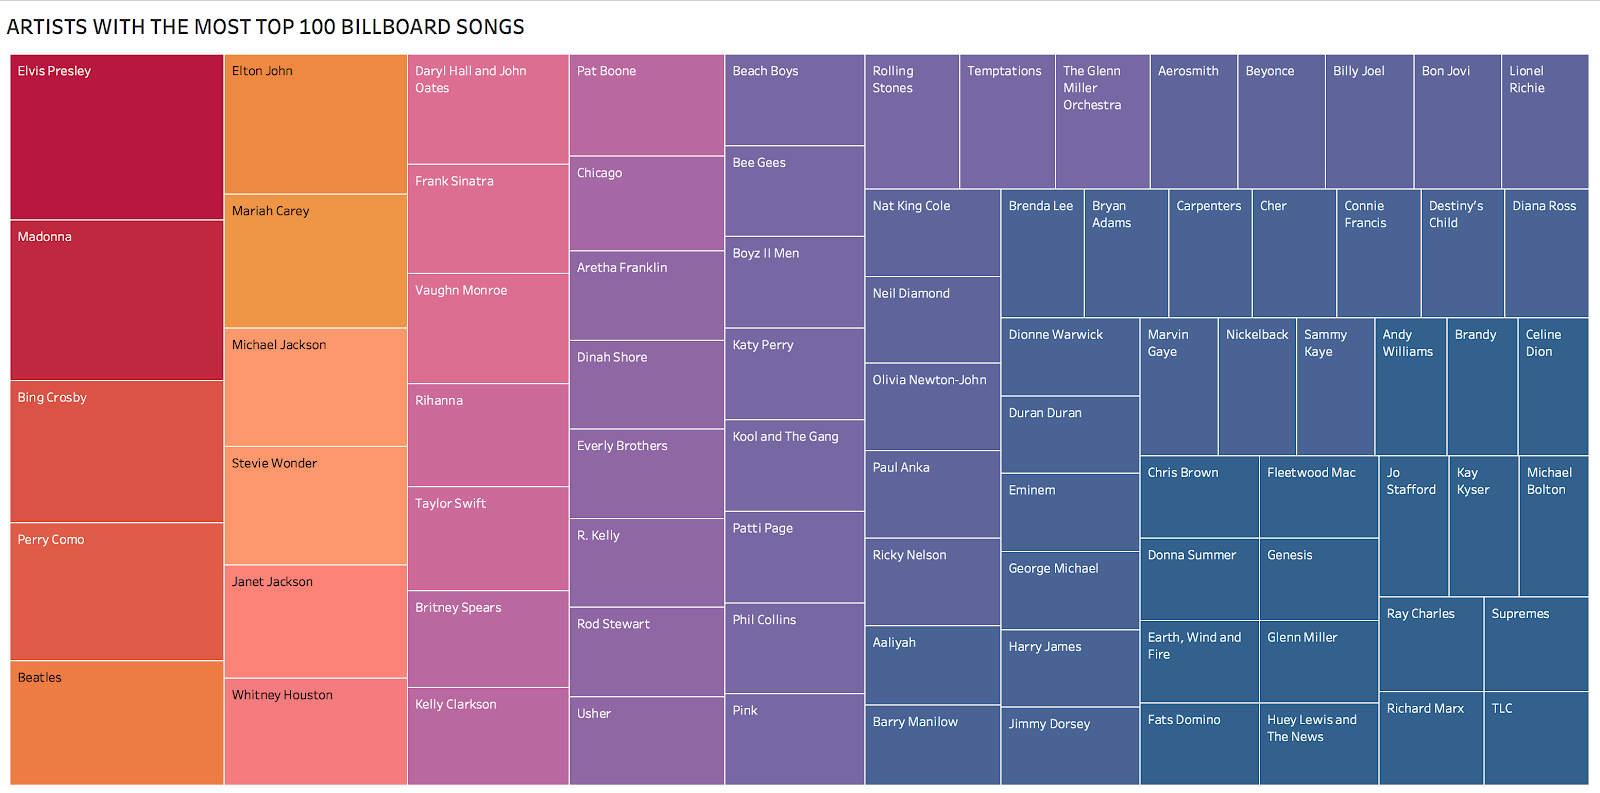

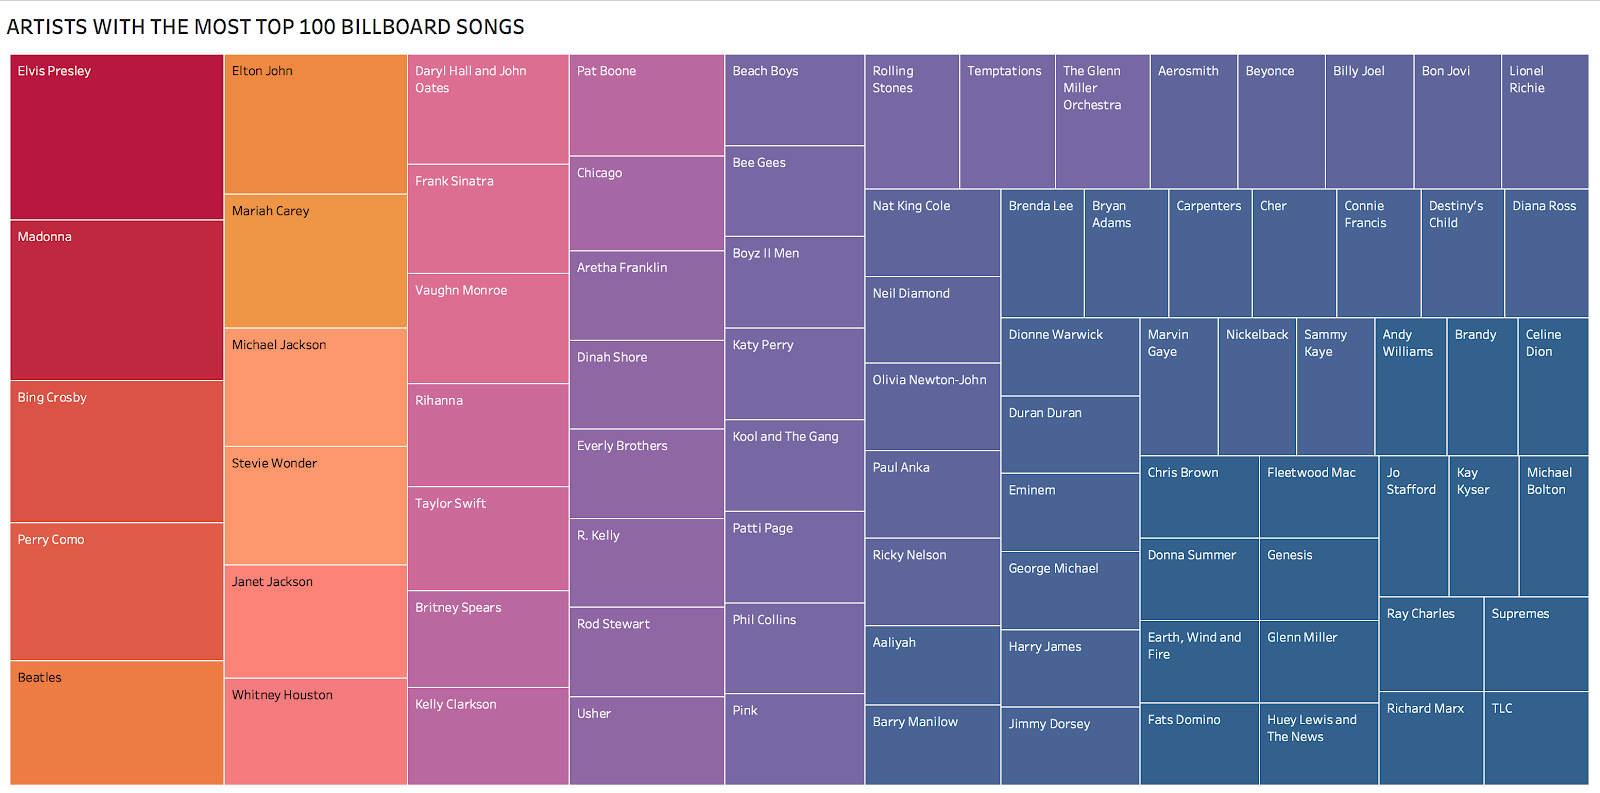

In [1]:
from IPython.display import Image
Image(filename='Fourth Question_CS_Final .png')

In this last image we created an image to help us explain who had the most top 100 billboard songs since 1941. We decided to use this kind of visual because it gave us the ability to show with the use of size, who had the most hit songs. Looking at the box visual we can see that Elvis Presley has the most hit songs followed up by Madonna. These two artists make since being number one and two of top songs since 1941, because these artists took the world by storm by their polorazing hits that still are played today. What shocked us the most was that the beatles were number 5 on this list of artists. We thought that the beatles would be higher in this ranking, because of how popular they were and still are in the music world. 


## Conclusion

Throughout this project, we learned a lot of web scrapping and learned how to use API. Our decision to use Spotify for the API, while choosing Top 100 billboard for webscrapping we believe was a great decision. Spotify was really easy to use for API and they walked us on their website on how to do it. While it was easy, it really helped us have hands on learning from what we have practiced in class up to this point. Webscrapping the top 100 billboard website, we believe was very important to our project because it helped input the songs that we wanted into our API in order to get the information of each song. Also, we had a lot of fun doing this project, as it got us to be creative with the ability to choose our own topic. This helped this project become something that we wanted to do for the last couple of weeks of class. Moving on from this project, we can now use what we have learned through the use of getting a token from the website, while also how to webscrape complext websites while getting the information that is desired. Even though we have created four visuals out of this data, we can still ask questions, such as: What makes Elvis Pressley have the most amount top songs? Also, we can conisder what artist has the most dancibility rating. Like we stated earlier, we enjoyed our time doing this project, and have learned a lot from this project.  